In [35]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv("mushrooms.csv")

In [37]:
df.head

<bound method NDFrame.head of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring 

In [38]:
df = pd.DataFrame(data=df)

In [39]:
df.shape

(8124, 23)

In [40]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [42]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

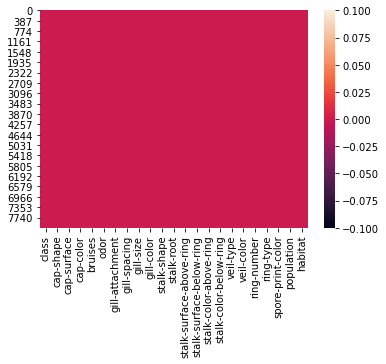

In [43]:
sb.heatmap(df.isnull())

In [44]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


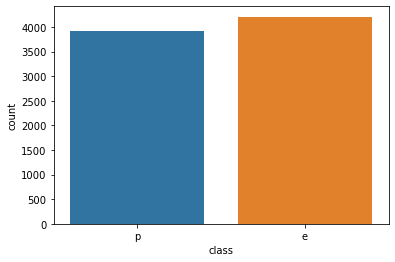

In [45]:
sb.countplot(x='class',data=df)
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
for col in df.columns:
    if df[col].dtypes=='object':
        le = LabelEncoder()
        df[col]=le.fit_transform(df[col])

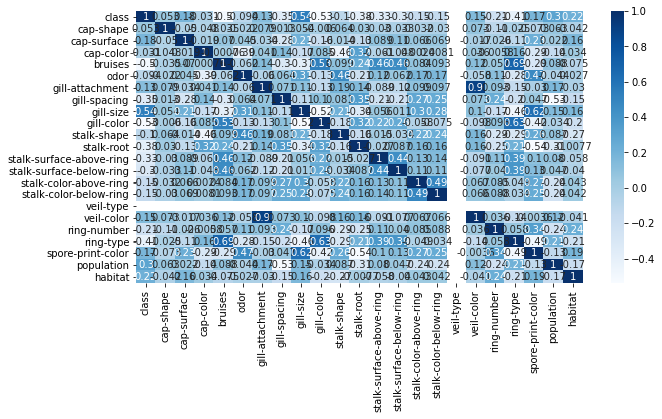

In [48]:
fig=plt.figure(figsize=(10,5))
hc=df.corr(method='pearson')
sb.heatmap(hc,annot=True,cmap="Blues")

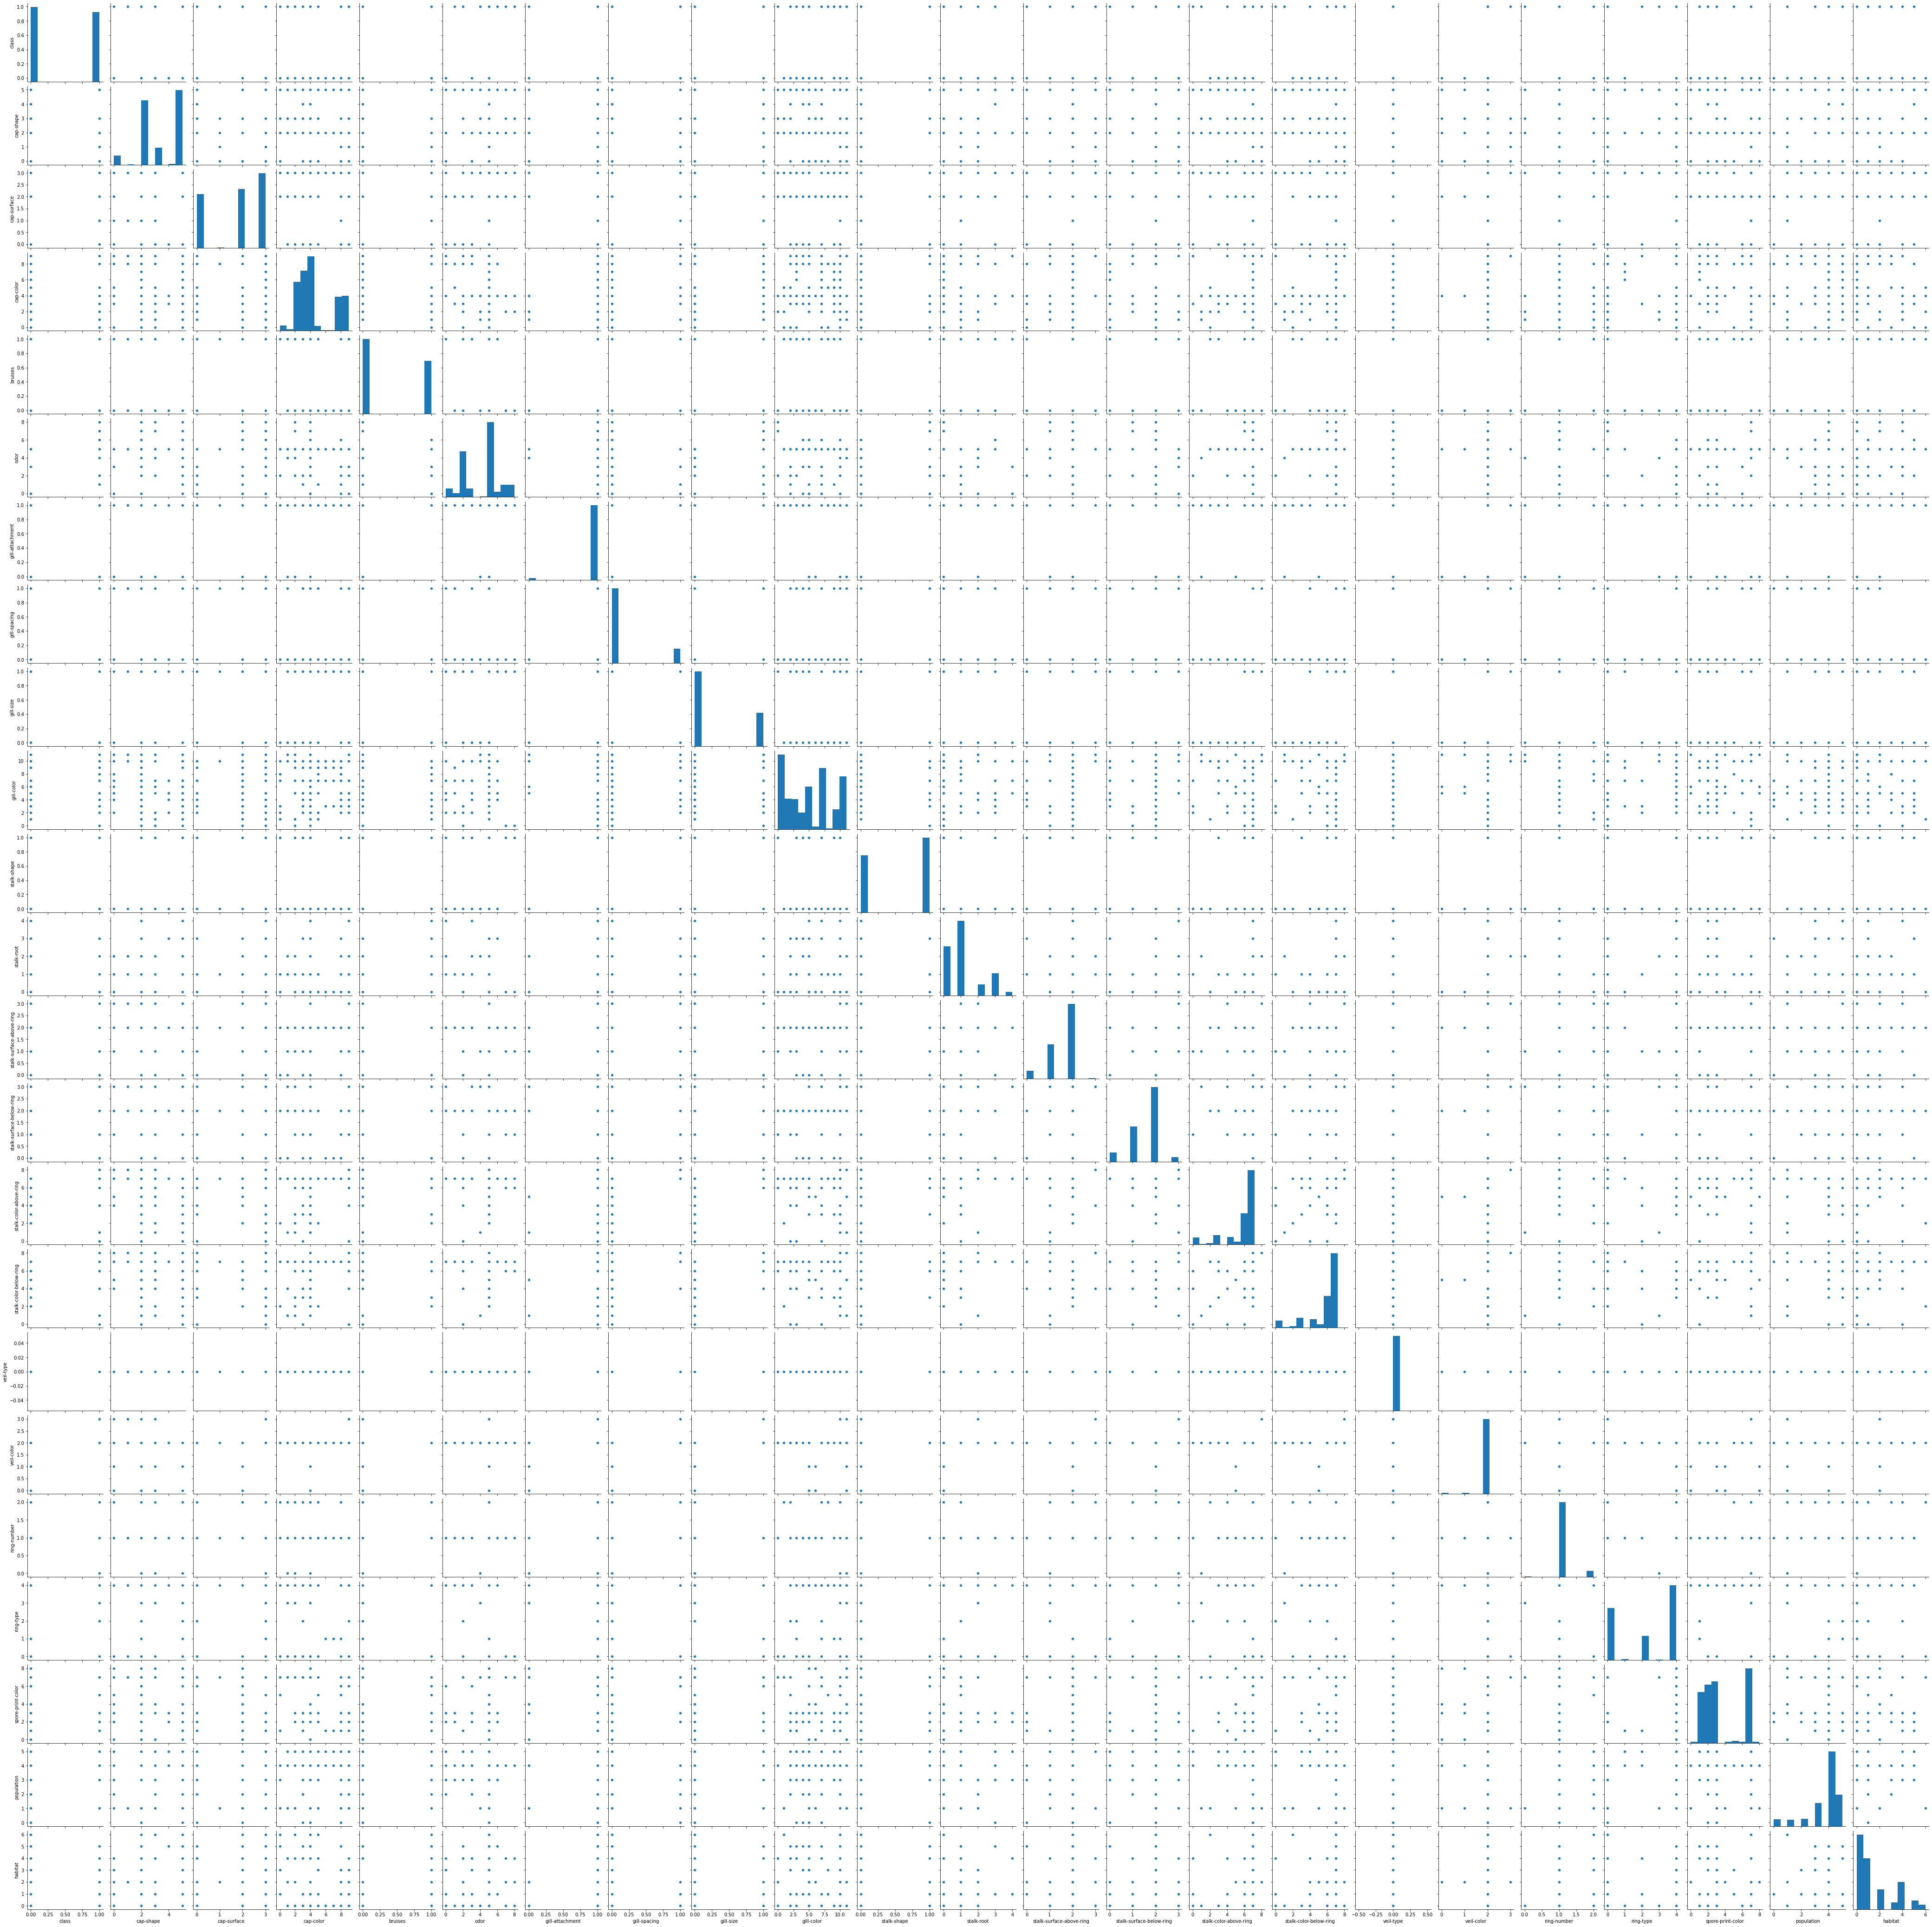

In [49]:
sb.pairplot(df)

In [50]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

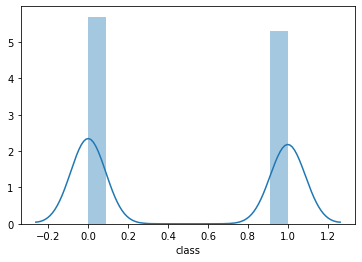

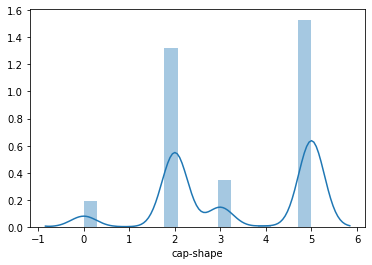

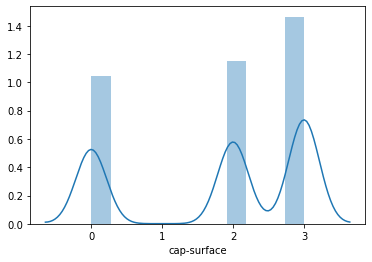

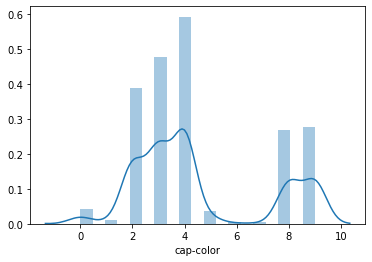

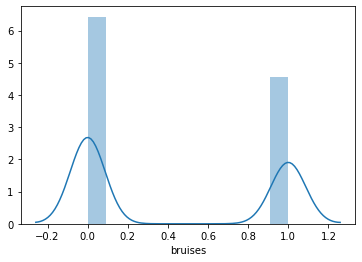

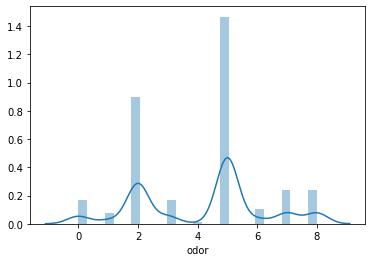

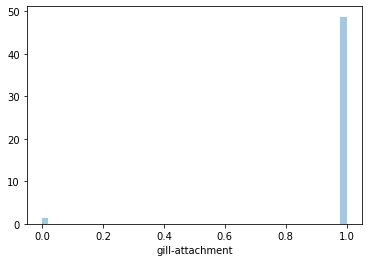

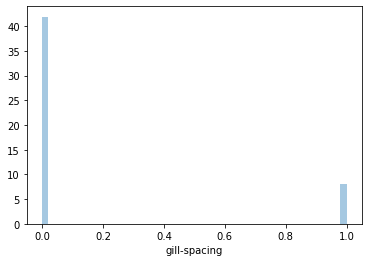

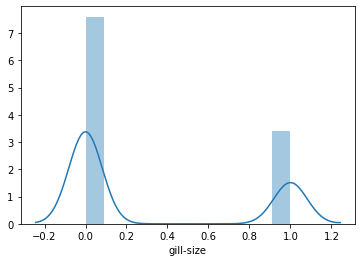

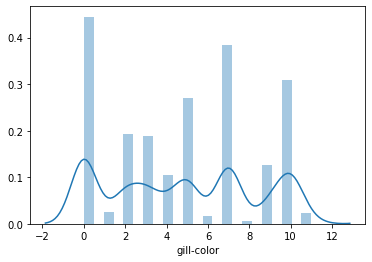

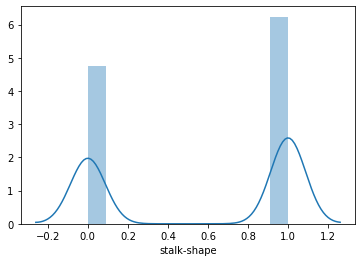

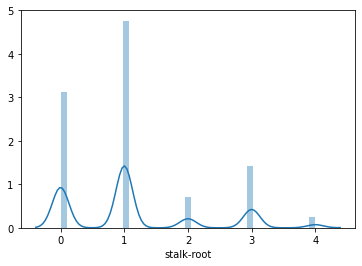

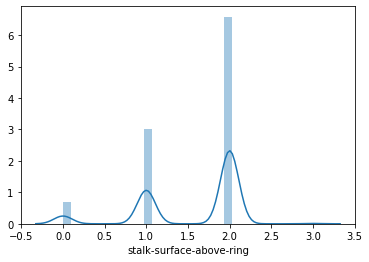

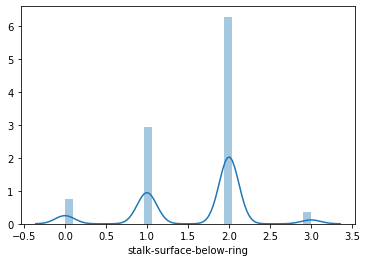

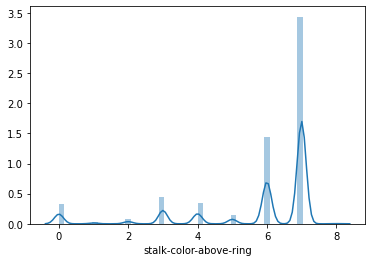

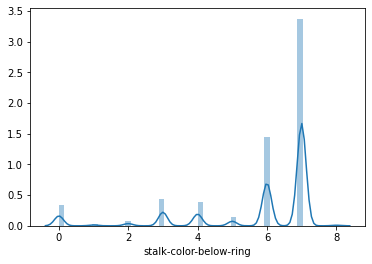

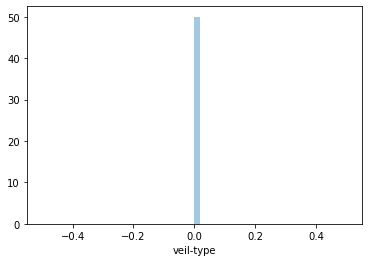

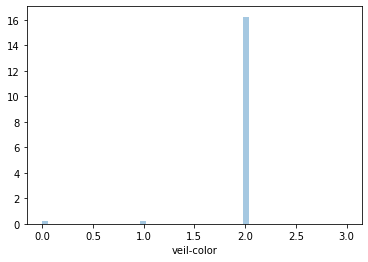

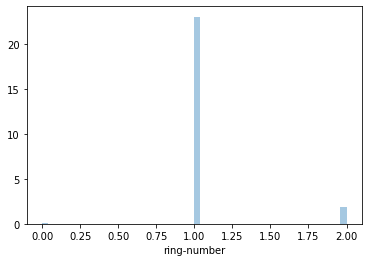

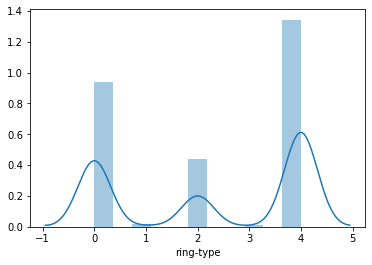

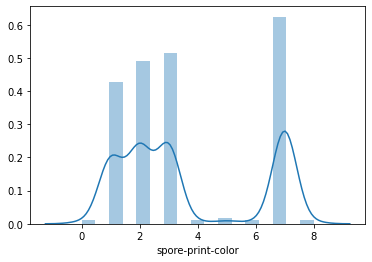

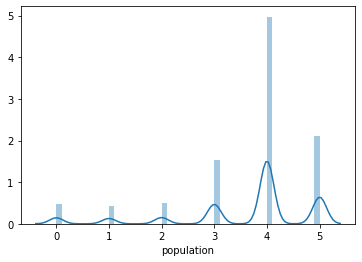

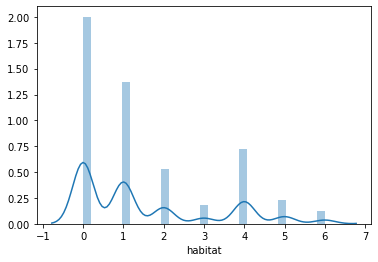

In [51]:
for i in df.columns:
    plt.figure()
    sb.distplot(df[i])

class                          AxesSubplot(0.125,0.125;0.0270979x0.755)
cap-shape                   AxesSubplot(0.157517,0.125;0.0270979x0.755)
cap-surface                 AxesSubplot(0.190035,0.125;0.0270979x0.755)
cap-color                   AxesSubplot(0.222552,0.125;0.0270979x0.755)
bruises                      AxesSubplot(0.25507,0.125;0.0270979x0.755)
odor                        AxesSubplot(0.287587,0.125;0.0270979x0.755)
gill-attachment             AxesSubplot(0.320105,0.125;0.0270979x0.755)
gill-spacing                AxesSubplot(0.352622,0.125;0.0270979x0.755)
gill-size                    AxesSubplot(0.38514,0.125;0.0270979x0.755)
gill-color                  AxesSubplot(0.417657,0.125;0.0270979x0.755)
stalk-shape                 AxesSubplot(0.450175,0.125;0.0270979x0.755)
stalk-root                  AxesSubplot(0.482692,0.125;0.0270979x0.755)
stalk-surface-above-ring     AxesSubplot(0.51521,0.125;0.0270979x0.755)
stalk-surface-below-ring    AxesSubplot(0.547727,0.125;0.0270979

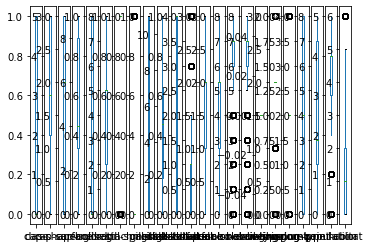

In [52]:
df.plot(kind='box',subplots=True,layout=(1,24))

In [62]:
x=df.drop(columns=['class'])
y=df[['class']]

In [63]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [64]:
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [65]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    accu=accuracy_score(y_test,predf)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=1
    
print("Best Accu is:",maxAccu,"on RS:",maxRS)
    

Best Accu is: 0.9664429530201343 on RS: 1


In [66]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=1)

In [67]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.9507829977628636
[[878  33]
 [ 55 822]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       911
           1       0.96      0.94      0.95       877

    accuracy                           0.95      1788
   macro avg       0.95      0.95      0.95      1788
weighted avg       0.95      0.95      0.95      1788



In [68]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy_score:
0.9194630872483222
[[838  73]
 [ 71 806]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       911
           1       0.92      0.92      0.92       877

    accuracy                           0.92      1788
   macro avg       0.92      0.92      0.92      1788
weighted avg       0.92      0.92      0.92      1788



In [69]:
sv=SVC()
sv.fit(x_train,y_train)
predv=sv.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predv))
print(confusion_matrix(y_test,predv))
print(classification_report(y_test,predv))

accuracy_score:
0.9865771812080537
[[910   1]
 [ 23 854]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       911
           1       1.00      0.97      0.99       877

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



In [70]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

accuracy_score:
1.0
[[911   0]
 [  0 877]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00       877

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [71]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
preda=ad.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preda))
print(confusion_matrix(y_test,preda))
print(classification_report(y_test,preda))

accuracy_score:
1.0
[[911   0]
 [  0 877]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00       877

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [74]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.72923077 0.96123077 0.79261538 0.65230769 0.49445813]
0.7259685486926866


In [75]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.81292308 0.99507692 0.89907692 1.         0.49938424]
0.841292231906025


In [76]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.84246154 1.         1.         1.         0.63054187]
0.8946006820765442


In [77]:
score=cross_val_score(LR,x,y,cv=5)
print(score)
print(score.mean())

[0.63015385 0.98276923 0.87569231 0.99815385 0.71366995]
0.8400878363016295


In [78]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.84246154 1.         1.         1.         0.71182266]
0.9108568397120121


In [79]:
joblib.dump(rf,'mushroom.obj')

['mushroom.obj']

In [80]:
mushroomfile=joblib.load("mushroom.obj")
mushroomfile.predict(x_train)

array([0, 1, 0, ..., 1, 0, 1])